Diferencia en % entre el precio minimo y el de cierre para preveer posibles cambios de tendencia bajista a alcista. Y lo mismo con el precio maximo viceversa.
Ejemplo: siempre que hubo una diferencia del 10% o mayor entre el precio minimo y el de cierre, la tendencia cambió y empezó a subir. Ahi identificas punto de compra.
En cambio, si hubo una diferencia mayor al 10% entre el precio maximl y el de cierre, cambia la tendencia y empeiza a bajar todo. Punto de venta

In [1]:
import pandas as pd
import numpy as np
#PLot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)

In [20]:
from download import data_crypto
con = data_crypto.data_crypto()

params = {"crypto": 'ADA',
          "days_back": 365,
          "time": '1DAY'}

c_data = con.crypto_download(params)

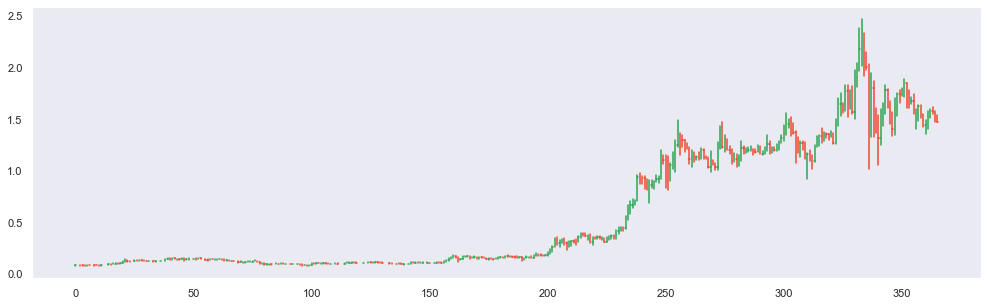

In [21]:
################################################Chart################################################
#Grafico el precio
x = np.arange(0,len(c_data))
fig, ax = plt.subplots(1, 1, figsize=(17,5))
for idx, val in c_data.iterrows():
    color = '#2CA453'
    if val['Open'] > val['Close']: color= '#F04730'
    # high/low lines
    ax.plot([x[idx], x[idx]], [val['Low'], val['High']], color=color)
    # open marker
    ax.plot([x[idx], x[idx]-0.1], [val['Open'], val['Open']], color=color)
    # close marker
    ax.plot([x[idx], x[idx]+0.1], [val['Close'], val['Close']], color=color)

In [22]:
c_data['Diferencia Low'] = c_data['Close'] / c_data['Low'] - 1
c_data['Diferencia High'] = c_data['Close'] / c_data['High'] - 1
c_data['Rendimiento'] = c_data['Close'].diff()
c_data.head()

,Date,Open,High,Low,Close,Volumen,Volumen USD,Diferencia Low,Diferencia High,Rendimiento
0,2020-06-16 21:00:00,0.07925,0.08398,0.07729,0.08349,470477521.4,3.810374e+07,0.080217,-0.005835,NaN
1,2020-06-17 21:00:00,0.08350,0.08454,0.08001,0.08176,316838158.3,2.610409e+07,0.021872,-0.032884,-0.00173
2,2020-06-18 21:00:00,0.08177,0.08190,0.07844,0.07987,273185135.5,2.188435e+07,0.018230,-0.024786,-0.00189
3,2020-06-19 21:00:00,0.07993,0.08023,0.07700,0.07953,152661332.8,1.201790e+07,0.032857,-0.008725,-0.00034
4,2020-06-20 21:00:00,0.07956,0.08099,0.07814,0.07841,150318561.8,1.196783e+07,0.003455,-0.031856,-0.00112


In [23]:
c_data.to_excel('ADA_20200616_20210617.xlsx', index=False)

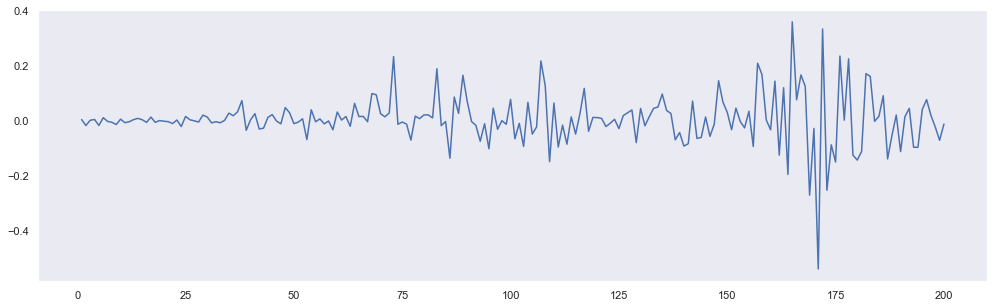

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(17,5))
ax.plot(c_data['Rendimiento'])